# Repaso para el obligatorio
---

Para este ejercicio se trabajará con un dataset que muestra las ventas de un producto a distintos países. Lamentablemente la información llega en un formato inadecuado para su análisis y tendremos que buscar la forma de acoplarla. Para completar esta actividad, debe realizar lo siguiente:

*  Obtenga el dataset repaso_data.xlsx
*  La columna code corresponde a tres elementos: 
  - Costo de producto
  - Cantidad de productos
  - Precio de venta del producto.  
A partir de esto, genere tres columnas: costo, cantidad, precio. 
*  Genere una columna 'ganancia' que sea la diferencia entre el costo por cantidad y el precio por cantidad. 
*  Genere una tabla que muestre la cantidad total de ganancia por país
  - Obtenga los 10 países con mayores ganancias y grafíquelos en un gráfico de barras horizontales. 
*  Genere una tabla que muestre el promedio de ganancia por país.
  - Obtenga los 5 países con mayores promedios y grafíquelos en un gráfico de torta. 


In [10]:
import pandas as pd
df = pd.read_excel('repaso_data.xlsx', parse_dates = ['date'])
df.head()

,id,country,code,date
0,1,Finland,876-05-1735,2021-03-02
1,2,Bolivia,115-81-8654,2020-12-18
2,3,Albania,275-80-4231,2020-08-04
3,4,Philippines,342-95-0920,2020-07-21
4,5,Philippines,138-55-5532,2021-04-23


In [13]:
df['costo'] = df.code.str.split('-', expand = True)[0].astype(int)
df['cantidad'] = df.code.str.split('-', expand = True)[1].astype(int)
df['precio'] = df.code.str.split('-', expand = True)[2].astype(int)
df['ganancia'] = (df.cantidad * df.precio) - (df.costo * df.cantidad) 
df.head()

,id,country,code,date,costo,cantidad,precio,ganancia
0,1,Finland,876-05-1735,2021-03-02,876,5,1735,4295
1,2,Bolivia,115-81-8654,2020-12-18,115,81,8654,691659
2,3,Albania,275-80-4231,2020-08-04,275,80,4231,316480
3,4,Philippines,342-95-0920,2020-07-21,342,95,920,54910
4,5,Philippines,138-55-5532,2021-04-23,138,55,5532,296670


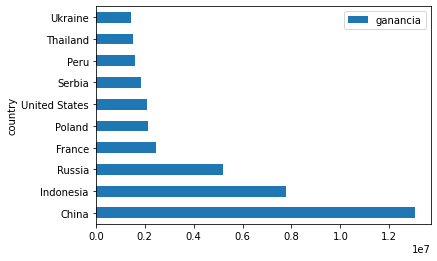

In [22]:
df.groupby('country').agg({
    'ganancia' : 'sum'
}).sort_values(by = 'ganancia', ascending = False).iloc[:10].plot(kind = 'barh')

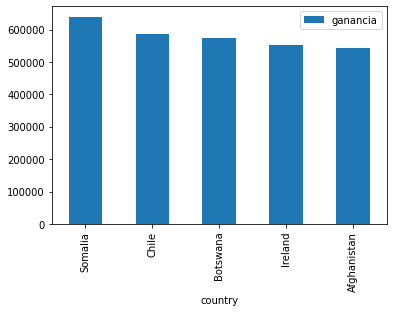

In [25]:
df.groupby('country').agg({
    'ganancia' : 'mean'
}).sort_values(by = 'ganancia', ascending = False).iloc[:5].plot(kind = 'bar')